In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics as mt_s

In [2]:
data = pd.read_csv('results.csv',header=None,delimiter=' ')

In [3]:
df = pd.DataFrame(data)

In [4]:
types = np.array(['apple','bat','beetle','bell','bird','Bone','bottle','brick','butterfly','camel','car','carriage','cattle','cellular_phone','chicken','children','chopper','classic','Comma','crown','cup','deer','device0','device1','device2','device3','device4','device5','device6','device7','device8','device9','dog','elephant','face','fish','flatfish','fly','fork','fountain','frog','Glas','guitar','hammer','hat','HCircle','Heart','horse','horseshoe','jar','key','lizzard','lmfish','Misk','octopus','pencil','personal_car','pocket','rat','ray','sea_snake','shoe','spoon','spring','stef','teddy','tree','truck','turtle','watch'])

In [5]:
data.shape

(2800, 1402)

In [7]:
for t in types:
    reg = '^' + t + '.*'
#     print(r'' + reg)
    df = df.replace(regex={reg:t})

In [52]:
df_ss = df[df[0] == 1]
df_mfd = df[df[0] == 2]

In [53]:
df_ss = df_ss.drop([0],axis=1)
df_mfd = df_mfd.drop([0],axis=1)

In [54]:
df_ss.shape

(1400, 1401)

In [55]:
df_mfd.shape

(1400, 1401)

In [56]:
# df_ss_sort = df_ss.sort_values(by=[1])
# df_mfd_sort = df_mfd.sort_values(by=[1])

In [57]:
df_ss = df_ss.values
df_mfd = df_mfd.values

In [62]:
df_ss_vec = np.ndarray((1400,1400)).astype(int)
df_mfd_vec = np.ndarray((1400,1400)).astype(int)
for row in range(df_ss.shape[0]):
    df_ss_vec[row] = df_ss[row][1:] == df_ss[row][0]
    df_mfd_vec[row] = df_mfd[row][1:] == df_mfd[row][0]

In [111]:
ss_sum = np.sum(df_ss_vec,axis=0)
mfd_sum = np.sum(df_mfd_vec,axis=0)

In [121]:
ss_sum

array([544, 216, 145, ...,  14,  25,  19])

In [114]:
def precision_and_recall(y_bool):
    precision = np.ndarray(y_bool.shape).astype(float)
    recall = np.ndarray(y_bool.shape).astype(float)
    for col in range(y_bool.shape[0]):
        precision[col] = np.sum(y_bool[0:col+1]) / ((col+1) * 1400.0)
        recall[col] = np.sum(y_bool[0:col+1]) / np.sum(y_bool)
    return precision, recall

In [115]:
ss_precision, ss_recall = precision_and_recall(ss_sum)
mfd_precision, mfd_recall = precision_and_recall(mfd_sum)

Text(0.5, 1.0, 'precision x recall')

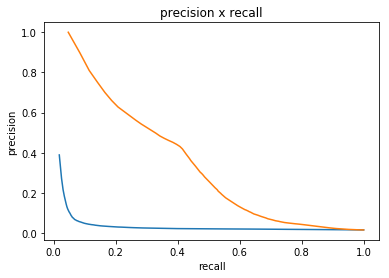

In [128]:
plt.plot(ss_recall,ss_precision)
plt.plot(mfd_recall,mfd_precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision x recall')